<a href="https://colab.research.google.com/github/L120Git/Deep_Learning_Airbnb/blob/main/2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.Librerías necesarias

In [ ]:
!pip install -q keras

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall networkx
!pip install networkx==2.6.2


Found existing installation: networkx 2.6.2
Uninstalling networkx-2.6.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/networkx-2.6.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.2/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.2/examples/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.6.2/ex

In [ ]:
#1D Lineal Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from tensorflow.keras import optimizers, Model
#Convolutional Neural Network
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.applications import imagenet_utils
import imageio as io

#Hyperopt
import sys
import time
import fractions
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.layers import Activation
from keras.callbacks import EarlyStopping

#Hybrid deep learning model
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.layers import Input, concatenate
from keras.models import Model
from keras.optimizers import Adam
import cv2 
import imutils
#from pyimagesearch import datasets
#from pyimagesearch import models
import argparse
import locale
import os


In [ ]:
# Montamos GDrive para almacenar los datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Carga de datos

In [ ]:
#cargamos los datos necesarios desde el gDrive
path = '/content/drive/MyDrive/NLP/'

x_train = pd.read_csv(f'{path}x_train.csv')
x_test= pd.read_csv(f'{path}x_test.csv')
y_train = pd.read_csv(f'{path}y_train.csv')
y_test= pd.read_csv(f'{path}y_test.csv')

### Compruebo medidas del dataset 


In [ ]:
# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
#print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (597, 9)
El conjunto de test tiene dimensiones:  (158, 9)


## Modelo con datos 1D

In [ ]:
# Hiper-parámetros de nuestra red, pruebo distintos parámetros hasta mejorar mi modelo

#lr = 0.1
#lr_decay = 1e-4
#n_epochs = 200  
#batch_size = 128

#cambio los parámetros para reducir el consumo de memoria y que tarde menos en entrenar
lr = 0.1
lr_decay = 1e-4
n_epochs = 100
batch_size = 64

#vuelvo a mejorar los parámetros para que aun me tarde menos al entrenar

#lr = 0.05
#lr_decay = 1e-4
#n_epochs = 50
#batch_size = 32


In [ ]:
x_train.shape #este es mi input shape

(597, 9)

[INFO]: Entrenando red neuronal...
Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 0.1239 - val_loss: 0.0992
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0876 - val_loss: 0.0694
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0482
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.0343
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.0255
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0198
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0163
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.0140
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 

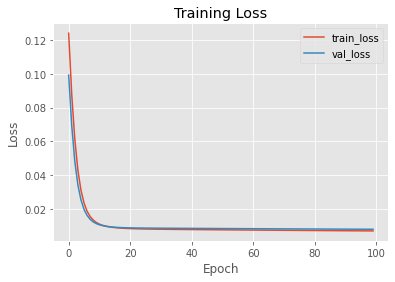

In [ ]:
np.random.seed(42)
# Implementamos la red empleando Keras
lineal_model = Sequential() # Instancia de modelo API secuencial #(X)
#model.add(Flatten()) # Estiramos los datos en forma de vector como entrada 
#model.add(Dense(128, activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros'))
lineal_model.add(Dense(9, input_shape=(9,),activation="relu")) 
lineal_model.add(Dense(5, activation="relu")) # Añadimos una capa con 32 neuronas y añadimos una función de activacion
lineal_model.add(Dense(1, activation="sigmoid"))  # Construimos nuestro Perceptron
  
# Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
lineal_model.compile(loss="mean_squared_error", optimizer=SGD(lr, decay=lr_decay/n_epochs))  #(X) optimizer='adam'

# Entrenando la solución
H_lm = lineal_model.fit(x_train, y_train, validation_split=0.2 , epochs=n_epochs, batch_size=batch_size)  #(X) aquí divido los datos de validacion

# Genero la predicción con los datos estandarizados de test
pred_lm = lineal_model.predict(x_test, batch_size=batch_size)


lineal_model.summary()
# Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H_lm.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H_lm.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_lm * max_Y
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")

El error cuadrático medio (rmse) de test es: 59.82627081327269
El error aboluto(mae) de test es: 42.29910198646256


In [ ]:
#calculamos las perdidas del modelo
test_loss = lineal_model.evaluate(x_test, y_test, verbose=0)
print('test loss: ', test_loss) 

test loss:  0.00730445422232151


##Modelo CNN

#### Preparación de los datos

In [ ]:
#Preparo los datos 
X_train_img = imagenes_train
X_test_img = imagenes_test

In [ ]:
#Comprobamos que tenemos todas las imagenes de X_Train y X_test cargadas con sus indices correspondientes
print('El número total de imagenes de entrenamiento es: ',len(imagenes_train)) # no son las imagenes correctas
print('El número total de imagenes de testing es: ',len(imagenes_test)) 
print("\n")
print("Las etiquetas de entrenamiento ", y_train.shape)
print("Las etiquetas de testing: ",y_test.shape)

El número total de imagenes de entrenamiento es:  597
El número total de imagenes de testing es:  158


Las etiquetas de entrenamiento  (597,)
Las etiquetas de testing:  (158,)


In [ ]:
#mis imagenes son imagenes_train & imagenes_test

In [ ]:
#inicializo con una semilla
np.random.seed(42)

input_shape = (224, 224, 3)


#X_train = imagenes_train
#X_test = imagenes_test
#y_train = y_train
#y_test = y_test

In [ ]:
#Realizamos el resize de las imagenes
input_shape = (224, 224,3)

 #resize train set
X_train_resized = []
for img in x_train:
  X_train_resized.append( cv2.resize(img, (224, 224))/255)
  
X_train_resized = np.array(X_train_resized)
print('X_train_resized: ',X_train_resized.shape)


 #resize test set
X_test_resized = []
for img in x_test:
  X_test_resized.append( cv2.resize(img, (224, 224))/255)
  
X_test_resized = np.array(X_test_resized)
print('X_test_resized: ',X_test_resized.shape)

X_train_resized:  (597, 224, 224)
X_test_resized:  (158, 224, 224)


In [ ]:
# normalizamos
new_width = 224
new_height = 224
dim = (new_width, new_height)

# Inicializa una lista para almacenar las imágenes redimensionadas y normalizadas
X_train_resized = []

# Recorre cada imagen en x_train
for img in imagenes_train:
    # Redimensiona la imagen
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0

    # Agrega la imagen redimensionada y normalizada a la lista
    X_train_resized.append(image_array)
    
#Realizamos lo mismo para los datos test

X_test_resized = []

for img in imagenes_test:
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0 

    # Agrega la imagen redimensionada y normalizada a la lista
    X_test_resized.append(image_array)
   

In [ ]:
 print((X_train_resized))

[array([[[0.3372549 , 0.27450982, 0.21176471],
        [0.36078432, 0.29803923, 0.23529412],
        [0.34901962, 0.28627452, 0.22352941],
        ...,
        [0.4117647 , 0.34901962, 0.2901961 ],
        [0.41568628, 0.3529412 , 0.2901961 ],
        [0.41960785, 0.3529412 , 0.28235295]],

       [[0.33333334, 0.27058825, 0.20784314],
        [0.36078432, 0.29803923, 0.23137255],
        [0.3529412 , 0.2901961 , 0.22745098],
        ...,
        [0.4117647 , 0.3529412 , 0.29411766],
        [0.41568628, 0.3529412 , 0.2901961 ],
        [0.41960785, 0.3529412 , 0.28235295]],

       [[0.33333334, 0.27058825, 0.20784314],
        [0.36078432, 0.29803923, 0.23137255],
        [0.35686275, 0.29411766, 0.23137255],
        ...,
        [0.41568628, 0.3647059 , 0.3019608 ],
        [0.42352942, 0.36078432, 0.29411766],
        [0.42352942, 0.36078432, 0.28627452]],

       ...,

       [[0.44313726, 0.29803923, 0.2       ],
        [0.47843137, 0.34117648, 0.2627451 ],
        [0.3647059 , 

In [ ]:
print((X_test_resized))

[array([[[0.8352941 , 0.5137255 , 0.18431373],
        [0.83137256, 0.50980395, 0.18039216],
        [0.827451  , 0.5058824 , 0.1764706 ],
        ...,
        [0.8980392 , 0.8627451 , 0.84313726],
        [0.89411765, 0.85882354, 0.8392157 ],
        [0.8784314 , 0.84313726, 0.8235294 ]],

       [[0.83137256, 0.5058824 , 0.1764706 ],
        [0.83137256, 0.50980395, 0.18039216],
        [0.83137256, 0.50980395, 0.18039216],
        ...,
        [0.9019608 , 0.8666667 , 0.84705883],
        [0.8862745 , 0.8509804 , 0.83137256],
        [0.8745098 , 0.8392157 , 0.81960785]],

       [[0.81960785, 0.49803922, 0.16862746],
        [0.83137256, 0.50980395, 0.18039216],
        [0.8392157 , 0.5176471 , 0.1882353 ],
        ...,
        [0.90588236, 0.87058824, 0.8509804 ],
        [0.88235295, 0.84705883, 0.827451  ],
        [0.8745098 , 0.8392157 , 0.81960785]],

       ...,

       [[0.11372549, 0.05490196, 0.02745098],
        [0.10980392, 0.05098039, 0.02352941],
        [0.10588235, 

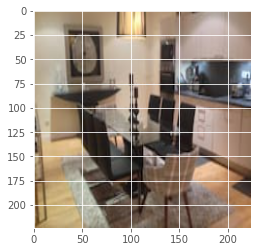

In [ ]:
plt.imshow(X_test_resized[12])

#### Comienzo con un Trasfer Learning de VGG16 (mis muestras son poco más de 500) con todas las capas congeladas

In [ ]:
np.random.seed(42)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Congelamos todas las capas de extración de características y modificamos el clasificador
for layer in base_model.layers: 
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last) #globalMaxPooling #pasar el tensor de caracteristicas a vector
x = Dense(9, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x) # regularización para reducir el sobreajuste
x = Dense(1, activation='linear', name='predictions')(x) #linear multiplica por x1.0, es la indentity function
model_cnn = Model(base_model.input, x)

# compilamos el modelo
model_cnn.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la estructura del modelo
model_cnn.summary()

Capa input_1 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64

In [ ]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

Epoch 1/20
4/4 [==============================] - 26s 5s/step - loss: 6040.4580 - mse: 6040.4580 - val_loss: 4714.8267 - val_mse: 4714.8267
Epoch 2/20
4/4 [==============================] - 2s 619ms/step - loss: 3596.8206 - mse: 3596.8206 - val_loss: 3719.4998 - val_mse: 3719.4998
Epoch 3/20
4/4 [==============================] - 2s 614ms/step - loss: 3684.9678 - mse: 3684.9678 - val_loss: 3872.6179 - val_mse: 3872.6179
Epoch 4/20
4/4 [==============================] - 2s 633ms/step - loss: 3832.6138 - mse: 3832.6138 - val_loss: 3778.6116 - val_mse: 3778.6116
Epoch 5/20
4/4 [==============================] - 2s 618ms/step - loss: 3400.5078 - mse: 3400.5078 - val_loss: 3631.5134 - val_mse: 3631.5134
Epoch 6/20
4/4 [==============================] - 2s 624ms/step - loss: 3012.7361 - mse: 3012.7361 - val_loss: 3715.2068 - val_mse: 3715.2068
Epoch 7/20
4/4 [==============================] - 2s 629ms/step - loss: 3097.6101 - mse: 3097.6101 - val_loss: 3813.9597 - val_mse: 3813.9597
Epoch 8/

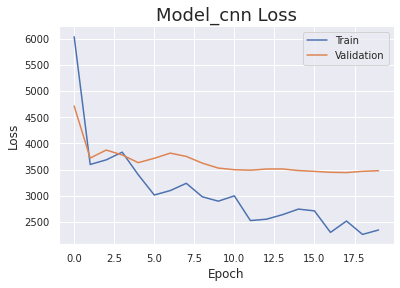

In [ ]:
# comenzamos con el entrenamiento
epochs = 20
batch_size = 128

# como entrenariamos normalmente
H_model_cnn = model_cnn.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=epochs)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_cnn = model_cnn.predict(X_test_resized, batch_size=batch_size)  #(X)

model_cnn.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_cnn.history['loss'], label='Train')
plt.plot(H_model_cnn.history['val_loss'], label='Validation')
plt.title('Model_cnn Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_cnn_denorm = pred_cnn 
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_cnn_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_cnn_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 51.482244193859664
El error aboluto(mae) de test es: 30.06005585344532


In [ ]:
#calculamos las perdidas del modelo
scores = model_cnn.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 3s 121ms/step - loss: 2650.4216 - mse: 2650.4216
Test loss: 2650.421630859375


#### Empiezo a descongelar capas

#### voy a aplicar Fine Tuning 

In [ ]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
np.random.seed(42)
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_FT.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x) 
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT = Model(bm_FT.input, x)

# compilamos el modelo
model_FT.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT.summary()

Capa input_2 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  

Epoch 1/20
4/4 [==============================] - 5s 898ms/step - loss: 17067.3555 - mse: 17067.3555 - val_loss: 3603.5037 - val_mse: 3603.5037
Epoch 2/20
4/4 [==============================] - 3s 669ms/step - loss: 5856.0732 - mse: 5856.0732 - val_loss: 8348.8242 - val_mse: 8348.8242
Epoch 3/20
4/4 [==============================] - 3s 682ms/step - loss: 7232.6641 - mse: 7232.6641 - val_loss: 6667.9897 - val_mse: 6667.9897
Epoch 4/20
4/4 [==============================] - 3s 734ms/step - loss: 5235.4570 - mse: 5235.4570 - val_loss: 3982.4089 - val_mse: 3982.4089
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 4782.5674 - mse: 4782.5674 - val_loss: 5006.9219 - val_mse: 5006.9219
Epoch 6/20
4/4 [==============================] - 3s 675ms/step - loss: 4290.9971 - mse: 4290.9971 - val_loss: 3689.5208 - val_mse: 3689.5208
Epoch 7/20
4/4 [==============================] - 3s 680ms/step - loss: 4222.9351 - mse: 4222.9351 - val_loss: 4743.7261 - val_mse: 4743.7261
Epoc

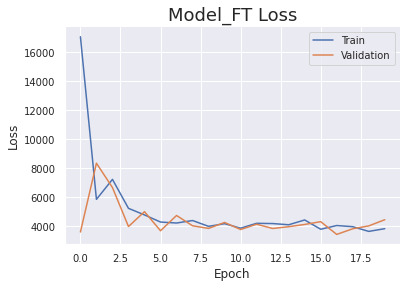

In [ ]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT = model_FT.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT = model_FT.predict(X_test_resized, batch_size=128)  #(X)

model_FT.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT.history['loss'], label='Train')
plt.plot(H_model_FT.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 59.780244692256844
El error aboluto(mae) de test es: 35.90731303601326


In [ ]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])



5/5 [==============================] - 1s 121ms/step - loss: 3573.6775 - mse: 3573.6775
Test loss: 3573.677490234375


##### voy a modificar los parámetros a ver si mejora

##### Pruebo a descongelar el penúltimo bloque a ver si mejora

In [ ]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT2 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Descongelo otra capa convolucional
#from keras.regularizers import l2

for layer in bm_FT2.layers:
  if layer.name == 'block4_conv1': 
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la penúltima capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT2.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT2 = Model(bm_FT2.input, x)

# compilamos el modelo
model_FT2.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT2.summary()

Capa input_3 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 8478.0371 - mse: 8478.0371 - val_loss: 4836.8687 - val_mse: 4836.8687
Epoch 2/20
4/4 [==============================] - 3s 821ms/step - loss: 30725.9434 - mse: 30725.9414 - val_loss: 7931.4214 - val_mse: 7931.4214
Epoch 3/20
4/4 [==============================] - 3s 823ms/step - loss: 6553.9497 - mse: 6553.9497 - val_loss: 4723.3755 - val_mse: 4723.3755
Epoch 4/20
4/4 [==============================] - 3s 817ms/step - loss: 4051.4524 - mse: 4051.4524 - val_loss: 4718.8843 - val_mse: 4718.8843
Epoch 5/20
4/4 [==============================] - 3s 818ms/step - loss: 3806.0298 - mse: 3806.0298 - val_loss: 3679.8037 - val_mse: 3679.8037
Epoch 6/20
4/4 [==============================] - 3s 819ms/step - loss: 3640.2244 - mse: 3640.2244 - val_loss: 3947.2024 - val_mse: 3947.2024
Epoch 7/20
4/4 [==============================] - 3s 817ms/step - loss: 3361.4380 - mse: 3361.4380 - val_loss: 3652.9954 - val_mse: 3652.9954
Epoch 8

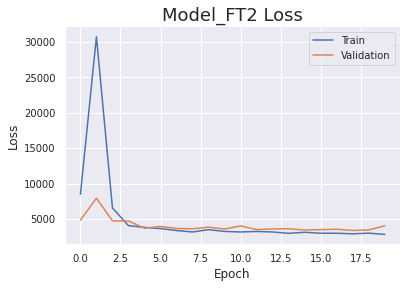

In [ ]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT2 = model_FT2.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20) #aumento las epocas a lo bestia a ver si mejora 

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT2 = model_FT2.predict(X_test_resized, batch_size=128)  #(X) 

model_FT2.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT2.history['loss'], label='Train')
plt.plot(H_model_FT2.history['val_loss'], label='Validation')
plt.title('Model_FT2 Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT2_denorm = pred_FT2
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT2_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT2_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 58.23673643562221
El error aboluto(mae) de test es: 33.94109387940998


##### Aquí me empeora el modelo, no voy a seguir descongelando capas, me quedo con el modelo anterior model_FT con solo el último bloque convolucional descongelado. Muestro los mejores resultados que he obtenido hasta ahora.

In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 59.780244692256844
El error aboluto(mae) de test es: 35.90731303601326


In [ ]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 1s 121ms/step - loss: 3573.6775 - mse: 3573.6775
Test loss: 3573.677490234375


##### Voy a probar con hyperopt a buscar los parámetros óptimos

##### Mejoro el modelo usando hyperot

In [ ]:
# instalamos los paquetes necesarios
#!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

In [ ]:
np.random.seed(42)
# definimos nuestro espacio de búsqueda
# vamos a variar:
# - el número de filtros en nuestras capas conv
# - el porcentaje de dropout
# - el número de neuronas en la capa dense
space = {
    'learning_rate': hp.choice('lr', [0.05, 0.001, 0.0001]),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'neurons_dense': hp.choice('neurons_dense', [256, 512, 1024]), 
}

def	get_callbacks(pars):
  callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto')]
  return callbacks

def mi_cnn(pars):
  print ('Parameters: ', pars)
  model = Sequential()
  # creamos el modelo base
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

  # vamos a entrenar la ultima capa conv para ver si mejoramos los datos
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(pars["neurons_dense"], activation='relu', name='fc1')(x)
  x = Dropout(pars['dropout'])(x)
  x = Dense(1, activation='sigmoid', name='predictions')(x)
  model = Model(base_model.input, x)

# compilamos el modelo
  model.compile(optimizer=Adam(lr=pars["learning_rate"]), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
  model.summary()

  
  # Entrenamos el modelo
  history = model.fit(X_train_resized, 
                      y_train,
                      batch_size=50,
                      shuffle=True,
                      epochs=8,
                      validation_split=0.2,
                      verbose = 0,
                      callbacks = get_callbacks(pars))

  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])

  
  print('Epoch {}  - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}


trials = Trials()
best = fmin(mi_cnn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Parameters: 
{'dropout': 0.41548336725666873, 'learning_rate': 0.05, 'neurons_dense': 256}
Capa block5_conv1 congelada.
Model: "model_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         

 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    

 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0 

In [ ]:
trials.losses()

[0.017532261088490486,
 0.017532261088490486,
 0.007298314478248358,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.0072502316907048225]

In [ ]:
print('El mejor conjunto de hiperarámetros tiene un loss: 0.00816590990871191,, y es:') 
print('\n dropout: 0.2031793781184285, learning_rate: 0.0001, neurons_dense: 256\n' )


El mejor conjunto de hiperarámetros tiene un loss: 0.00816590990871191,, y es:

 dropout: 0.2031793781184285, learning_rate: 0.0001, neurons_dense: 256



#### entreno el modelo bueno con los hiperparámetros que me ha dado el hyperot

In [ ]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_cnn_hp = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_cnn_hp.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_cnn_hp.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_cnn_hp.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x) 
x = Dropout(0.20)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_cnn_hp = Model(bm_cnn_hp.input, x)

# compilamos el modelo
model_cnn_hp.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_cnn_hp.summary()

Capa input_14 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)

Epoch 1/20
4/4 [==============================] - 4s 789ms/step - loss: 6998.5757 - mse: 6998.5757 - val_loss: 6072.1138 - val_mse: 6072.1138
Epoch 2/20
4/4 [==============================] - 3s 688ms/step - loss: 3947.3682 - mse: 3947.3682 - val_loss: 4363.2056 - val_mse: 4363.2056
Epoch 3/20
4/4 [==============================] - 3s 687ms/step - loss: 3706.8894 - mse: 3706.8894 - val_loss: 3715.2439 - val_mse: 3715.2439
Epoch 4/20
4/4 [==============================] - 3s 686ms/step - loss: 3217.5854 - mse: 3217.5854 - val_loss: 4029.9309 - val_mse: 4029.9309
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 3251.4744 - mse: 3251.4744 - val_loss: 3556.5874 - val_mse: 3556.5874
Epoch 6/20
4/4 [==============================] - 3s 690ms/step - loss: 3063.0227 - mse: 3063.0227 - val_loss: 3542.8474 - val_mse: 3542.8474
Epoch 7/20
4/4 [==============================] - 3s 685ms/step - loss: 2734.8933 - mse: 2734.8933 - val_loss: 3536.8594 - val_mse: 3536.8594
Epoch 

2/2 [==============================] - 1s 519ms/step
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 bloc

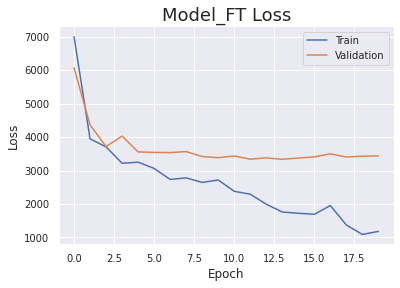

In [ ]:
#entreno de nuevo

# como entrenariamos normalmente
H_cnn_hp = model_cnn_hp.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_hp = model_cnn_hp.predict(X_test_resized, batch_size=128)  #(X)

model_cnn_hp.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_cnn_hp.history['loss'], label='Train')
plt.plot(H_cnn_hp.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
# comprobamos el loss en el test set
scores = model_cnn_hp.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 1s 122ms/step - loss: 2642.9424 - mse: 2642.9424
Test loss: 2642.9423828125


In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_hp
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 51.40955223578707
El error aboluto(mae) de test es: 32.24975412706785


Hyperopt me mejora el mse, a costa de empeorar el mae. Siguen siendo unos valores altos de error.

## Modelo híbrido

In [ ]:
#remember de mis datos
#x_train, train normalizado
#x_test, test normalizado

#y_train, etiquetas norm
#y_test, etiquetas norm

#X_train_resized, imagenes norm
#X_test_resized, imagenes norm

##### Modelo híbrido básico 

In [ ]:
np.random.seed(42)
#Inputs MLP
inputs_mlp = Input(shape=(9,))
x_mlp1 = Dense(9, activation='relu', bias_initializer='zeros')(inputs_mlp)
x_mlp2 = Dense(3, activation='relu')(x_mlp1)


#Imputs CNN
#inputs_cnn = Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x1 = Conv2D(9, (3,3), activation='relu')(last)
x2 = MaxPooling2D(pool_size=(2,2)) (x1)  #aquí dejo mis 9 neuronas a 3
x3 = Flatten()(x2) #paso a vector

In [ ]:
#concat of inputs
combinedInput = concatenate([x_mlp2,x3])
# output 
output = Dense (1, activation='linear') (combinedInput)

In [ ]:
#Definir el modelo
model_hib= Model(inputs=[inputs_mlp, base_model.input], outputs=output)


In [ ]:
#optimizador
opt = Adam(lr=1e-3, decay=1e-3 / 20)

# Compilación del modelo
model_hib.compile(loss='mse', optimizer=opt)

In [ ]:
# train the model
H_hib= model_hib.fit([X_train_norm, X_train_resized], y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 4s 806ms/step - loss: 0.4548 - val_loss: 0.1607
Epoch 2/20
4/4 [==============================] - 3s 678ms/step - loss: 0.4764 - val_loss: 0.1021
Epoch 3/20
4/4 [==============================] - 3s 687ms/step - loss: 0.1627 - val_loss: 0.1056
Epoch 4/20
4/4 [==============================] - 3s 706ms/step - loss: 0.1044 - val_loss: 0.0995
Epoch 5/20
4/4 [==============================] - 3s 710ms/step - loss: 0.0975 - val_loss: 0.0916
Epoch 6/20
4/4 [==============================] - 3s 705ms/step - loss: 0.0891 - val_loss: 0.0832
Epoch 7/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0804 - val_loss: 0.0747
Epoch 8/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0719 - val_loss: 0.0664
Epoch 9/20
4/4 [==============================] - 3s 713ms/step - loss: 0.0637 - val_loss: 0.0588
Epoch 10/20
4/4 [==============================] - 3s 731ms/step - loss: 0.0561 - val_loss: 0.0517
Epoch 11/20
4/4 [==

[INFO] predicting house prices...


5/5 [==============================] - 1s 125ms/step
0.08273742573723117
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                  

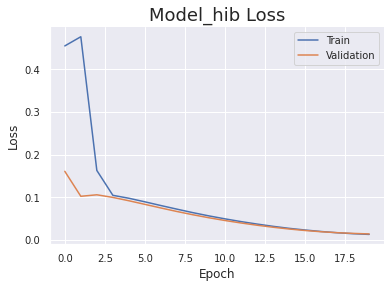

In [ ]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds_hib= model_hib.predict([x_test, X_test_resized])

diff = preds_hib.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np. abs(diff)
print(absPercentDiff.mean())

model_hib.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_hib.history['loss'], label='Train')
plt.plot(H_hib.history['val_loss'], label='Validation')
plt.title('Model_hib Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
print('mean: ', np.mean(absPercentDiff))
print('desviación standard: ', np.std(absPercentDiff))


mean:  0.08273742573723117
desviación standard:  0.06500238019326465


In [ ]:
#desnormalizo el resultado para ver el precio en eur en lo que nos estamos confundiendo
pred_desnorm=preds_hib*max_Y

diff = list(flatten(pred_desnorm)) - (y_test*max_Y)
absPercentDiff = np. abs(diff)
print("El error medio en EUR",absPercentDiff.mean())


El error medio en EUR 57.916198160829424


In [ ]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_hib_denorm = preds_hib
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_hib_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_hib_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 86.468692112509
El error aboluto(mae) de test es: 68.40534672176442


#### Los valores son muy malos, voy a ver que resultados me da usando flatten como en mi CNN

In [ ]:
np.random.seed(42)
#Inputs MLP
inputs_mlp1 = Input(shape=(9,)) 
x1_mlp1 = Dense(9, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros')(inputs_mlp)
x1_mlp2 = Dense(3, activation='relu')(x1_mlp1)

#Imputs CNN
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model1.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model1.layers[-1].output
x1 = Flatten()(last)
x2 = Dense(9, activation='relu')(x1)
x3 = Dense(5, activation='relu', name='fc1')(x2)
x4 = Dropout(0.3)(x3)
x5 = Dense(3, activation='relu')(x4)

In [ ]:
#concat of inputs
combinedInput1 = concatenate([x1_mlp2,x5])
# output 
output1 = Dense (1, activation='linear') (combinedInput1)

#Definir el modelo
model_hib1= Model(inputs=[inputs_mlp, base_model1.input], outputs=output1)


In [ ]:
#optimizador
opt1 = Adam(lr=1e-3, decay=1e-3 / 20)

# Compilación del modelo
model_hib1.compile(loss='mse', optimizer=opt1)

In [ ]:
# train the model
H_hib1= model_hib1.fit([X_train_norm, X_train_resized], y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 4s 777ms/step - loss: 0.0517 - val_loss: 0.0171
Epoch 2/20
4/4 [==============================] - 3s 674ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 3/20
4/4 [==============================] - 3s 678ms/step - loss: 0.1106 - val_loss: 0.0087
Epoch 4/20
4/4 [==============================] - 3s 685ms/step - loss: 0.0207 - val_loss: 0.0151
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 0.0192 - val_loss: 0.0180
Epoch 6/20
4/4 [==============================] - 3s 700ms/step - loss: 0.0127 - val_loss: 0.0150
Epoch 7/20
4/4 [==============================] - 3s 712ms/step - loss: 0.0152 - val_loss: 0.0177
Epoch 8/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0158 - val_loss: 0.0173
Epoch 9/20
4/4 [==============================] - 3s 696ms/step - loss: 0.0154 - val_loss: 0.0169
Epoch 10/20
4/4 [==============================] - 3s 689ms/step - loss: 0.0149 - val_loss: 0.0164
Epoch 11/20
4/4 [==

[INFO] predicting house prices...
5/5 [==============================] - 1s 118ms/step
0.06358639543852473
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][

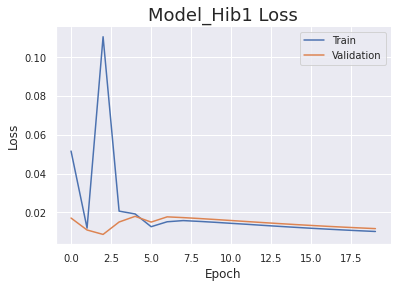

In [ ]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds_hib1= model_hib1.predict([x_test, X_test_resized])

diff1 = preds_hib1.flatten() - y_test
percentDiff1 = (diff1 / y_test) * 100
absPercentDiff1 = np. abs(diff1)
print(absPercentDiff1.mean())

model_hib1.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_hib1.history['loss'], label='Train')
plt.plot(H_hib1.history['val_loss'], label='Validation')
plt.title('Model_Hib1 Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
print('mean: ', np.mean(absPercentDiff1))
print('desviación standard: ', np.std(absPercentDiff1))


mean:  0.06358639543852473
desviación standard:  0.0744639695999355


In [ ]:
#desnormalizo el resultado para ver el precio en eur en lo que nos estamos confundiendo
pred_desnorm1=preds_hib1*max_Y

diff1 = list(flatten(pred_desnorm1)) - (y_test*max_Y)
absPercentDiff1 = np. abs(diff1)
print("El error medio en EUR",absPercentDiff1.mean())


El error medio en EUR 44.5104768246035


#### He obtenido mejores resultados utilizando densas y añadiento un dropout, ya que el maxpooling lo lleva el VGG16, creo que es más óptimo usar Dropout entre las densas. Puedo mejorar los resultados haciendo data aumentation. Probaré utilizando la sigmoide como capa de salida. 